In [2]:
import cv2
import os


In [3]:
images_name = os.listdir('images')


In [4]:
images = []
for i in images_name:
    images.append(cv2.imread('images/'+i))

In [5]:
import matplotlib.pyplot as plt

In [12]:
import cv2
import numpy as np
import random

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the video capture
video_capture = cv2.VideoCapture(0)

# Get the frame dimensions
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Resize the images to (30, 50)
resized_images = [cv2.resize(image, (30, 50)) for image in images]

# Flag to indicate if face is detected
face_detected = False

while True:
    # Read the frame from the video capture
    ret, frame = video_capture.read()

    frame=cv2.flip(frame, 1)

    # Convert the frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:
        # Face detected
        face_detected = True
        # faces = [(100, 50, 200, 200), (50, 100, 150, 150), (200, 80, 150, 150)]
        # this code below does this
        # [(50, 100, 150, 150), (100, 50, 200, 200), (200, 80, 150, 150)]
        # Sort faces by x-coordinate (left to right)
        faces = sorted(faces, key=lambda x: x[0])

        # Get the first detected face
        (x, y, w, h) = faces[0]
        new_resized_images = [cv2.resize(image, (int(w/3), int(h/3))) for image in images]
        
        

        # Overlay the images in a 3x3 grid on the detected face
        grid_size = 3
        image_index = 0

        for row in range(grid_size):
            for col in range(grid_size):
                if image_index < len(new_resized_images):
                    # Calculate the position to overlay the image
                    x_offset = x + col * int(w/3)
                    y_offset = y + row * int(h/3)

                    # Make sure the image does not go beyond the frame boundaries
                    # x_offset = max(0, x_offset)
                    # y_offset = max(0, y_offset)
                    # x_offset = min(x_offset, frame_width - resized_images[image_index].shape[1])
                    # y_offset = min(y_offset, frame_height - resized_images[image_index].shape[0])

                    # Create a region of interest (ROI) for the image
                    roi = frame[y_offset:y_offset + int(h/3),x_offset:x_offset + int(w/3)]

                    # Add the image to the ROI
                    # roi pachadi ko 0 cha ni tesle image frame ma kati ko visible hos vanxa
                    blended = cv2.addWeighted(roi, 0, new_resized_images[image_index], 1, 1)
                    frame[y_offset:y_offset + int(h/3),x_offset:x_offset + int(w/3)] = blended

                image_index += 1

    else:
        # No face detected
        face_detected = False

        # Overlay the images at random positions
        for image in resized_images:
            # Randomly select x, y position for the image
            x = random.randint(0, frame_width - image.shape[1])
            y = random.randint(0, frame_height - image.shape[0])

            # Create a region of interest (ROI) for the image
            roi = frame[y:y + image.shape[0], x:x + image.shape[1]]

            # Add the image to the ROI
            blended = cv2.addWeighted(roi, 0, image, 1, 0)
            frame[y:y + image.shape[0], x:x + image.shape[1]] = blended

    # Display the frame
    cv2.imshow('Camera', frame)

    # Check for the "q" key press
    key = cv2.waitKey(100)
    if key == ord('q'):
        break

# Release the video capture and close the window
video_capture.release()
cv2.destroyAllWindows()


In [7]:
for i, image in enumerate(resized_images):
    print(image.shape)

(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)
(50, 30, 3)


In [8]:
sorted(faces, key=lambda x: x[0])

[]

In [9]:
import matplotlib.pyplot as plt

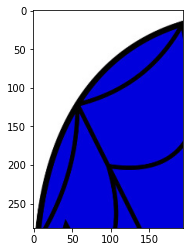

(282, 194, 3)


In [10]:
# Display image[1]
plt.imshow(images[0])
plt.show()
print(images[0].shape)

In [11]:
import os
files = os.listdir('images')
files


['image_part_001.jpg',
 'image_part_002.jpg',
 'image_part_003.jpg',
 'image_part_004.jpg',
 'image_part_005.jpg',
 'image_part_006.jpg',
 'image_part_007.jpg',
 'image_part_008.jpg',
 'image_part_009.jpg']